In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
import scipy.optimize

import warnings
warnings.filterwarnings("ignore")


Data:

In [ ]:
def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

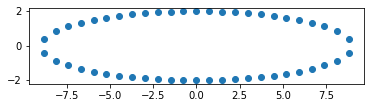

In [ ]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [ ]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

Custom SGDRegressor:

In [ ]:
class CustomSGDRegressor:

  def __init__(self,alpha=0.0001,eta0=0.01,max_iter=1000,tol=0.001,shuffle=True,random_state=None):
    self.alpha=alpha
    self.eta0=eta0
    self.max_iter=max_iter
    self.tol=tol
    self.shuffle=shuffle
    self.random_state=random_state

  def fit(self,X,y):
    coef = np.zeros((len(X[0]),))
    intercept = 0
    loss = []
    for i in range(self.max_iter):
      if len(loss)>1 and loss[-2]-loss[-1] < self.tol:
       break
    else:
      if self.shuffle==True:
        if self.random_state != None:
          np.random.seed(self.random_state)
          row_index = np.random.choice(len(X),size=(len(X),),replace=False)  #shuffling rows for every new epoch
      else:
        row_index = np.arange(0,len(X))
      for j in row_index:
        coef_updated = coef - self.eta0*( (-X[j]*( y[j] - np.dot(coef,X[j]) - intercept )) + self.alpha*2*coef )
        intercept_updated = intercept + self.eta0*( y[j] - np.dot(coef,X[j]) - intercept )
        coef = coef_updated
        intercept = intercept_updated
      loss.append( ( 0.5*( y - np.dot(X,coef) - intercept )**2 + self.alpha*coef*coef) / len(X) )
    self.coef_ = coef
    self.intercept_ = intercept

Testing:

Taking 3 values for regularization coefficient alpha = [ 0.0001, 1, 100 ] and adding outliers points (single point to 5 points).

Custom output:

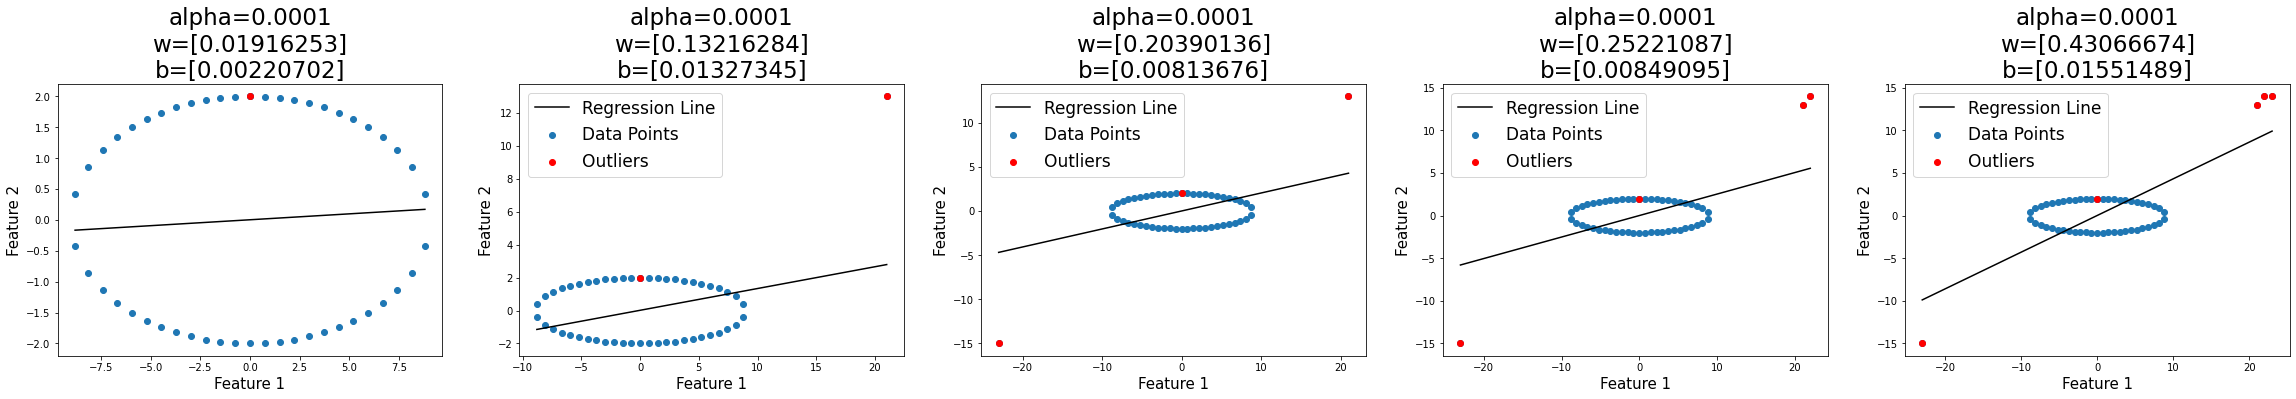

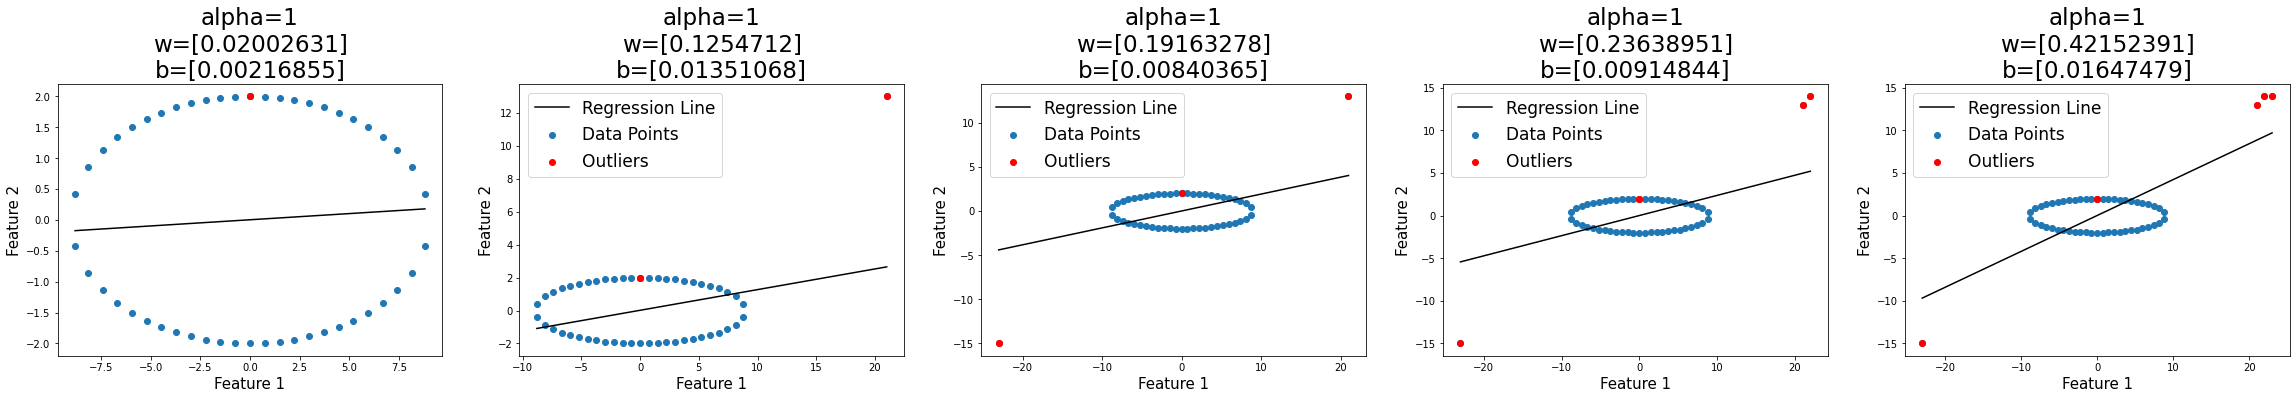

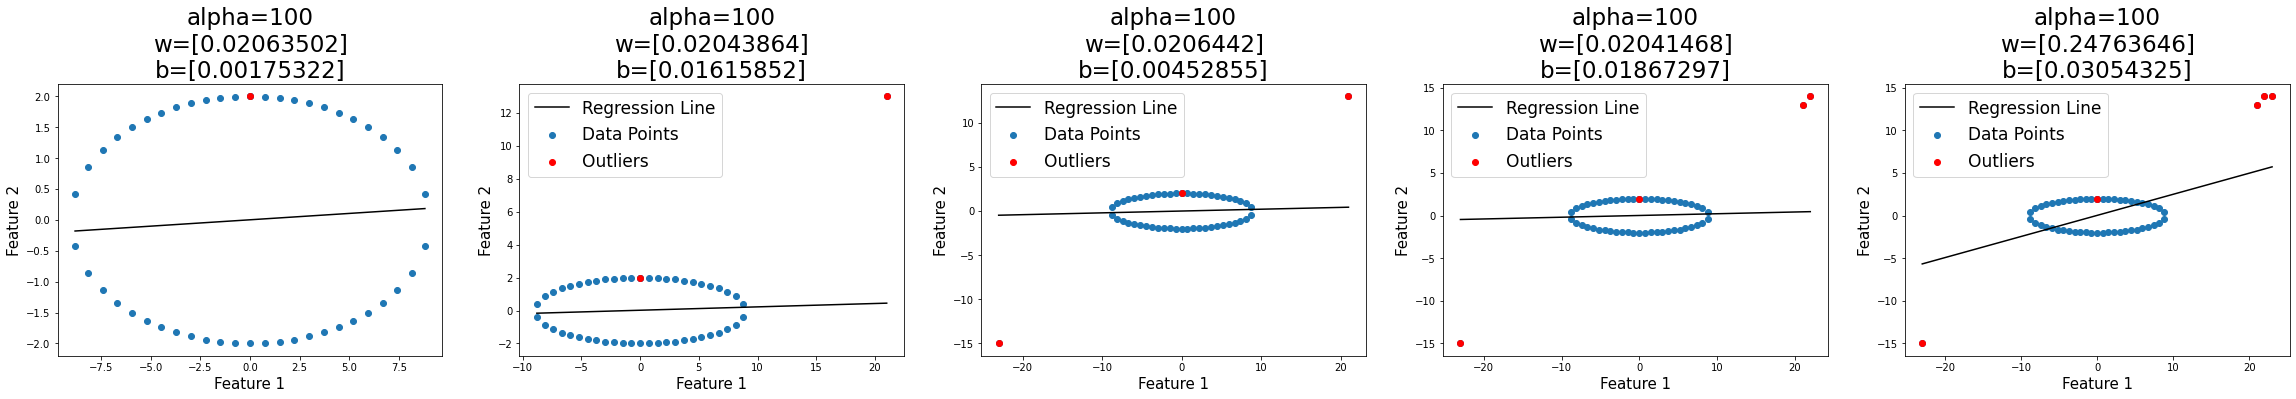

In [ ]:
alpha = [0.0001, 1, 100] 
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] 
-
for a in alpha:
  X_reg = np.copy(X)
  Y_reg = np.copy(Y)
  plt.figure(figsize=(40,5))
  for i in range(len(outliers)):
    X_reg = np.append(X_reg,outliers[i][0]).reshape(-1,1)
    Y_reg = np.append(Y_reg,outliers[i][1]).reshape(-1,1)
    plt.subplot(1,len(outliers),i+1)
    plt.scatter(X_reg,Y_reg)
    plt.scatter(X_reg[len(X_reg)-i-1:],Y_reg[len(Y_reg)-i-1:], color='red')
    plt.xlabel('Feature 1',fontsize=15)
    plt.ylabel('Feature 2',fontsize=15)
    reg = CustomSGDRegressor(alpha=a,eta0=0.001,random_state=15)
    reg.fit(X_reg,Y_reg)
    coef = reg.coef_ 
    intercept = reg.intercept_
    plt.title(f'alpha={a}\nw={coef}\nb={intercept}', fontsize=23)
    x1 = max(X_reg)
    x2 = min(X_reg)
    y1 = coef*x1 + intercept
    y2 = coef[0]*x2 + intercept[0]
    plt.plot( [x1,x2] , [y1,y2] , color='black')
    if i!=0:
      plt.legend(labels=['Regression Line','Data Points','Outliers'],fontsize=17)
  plt.show()

------------------------------------------

Sklearn output:

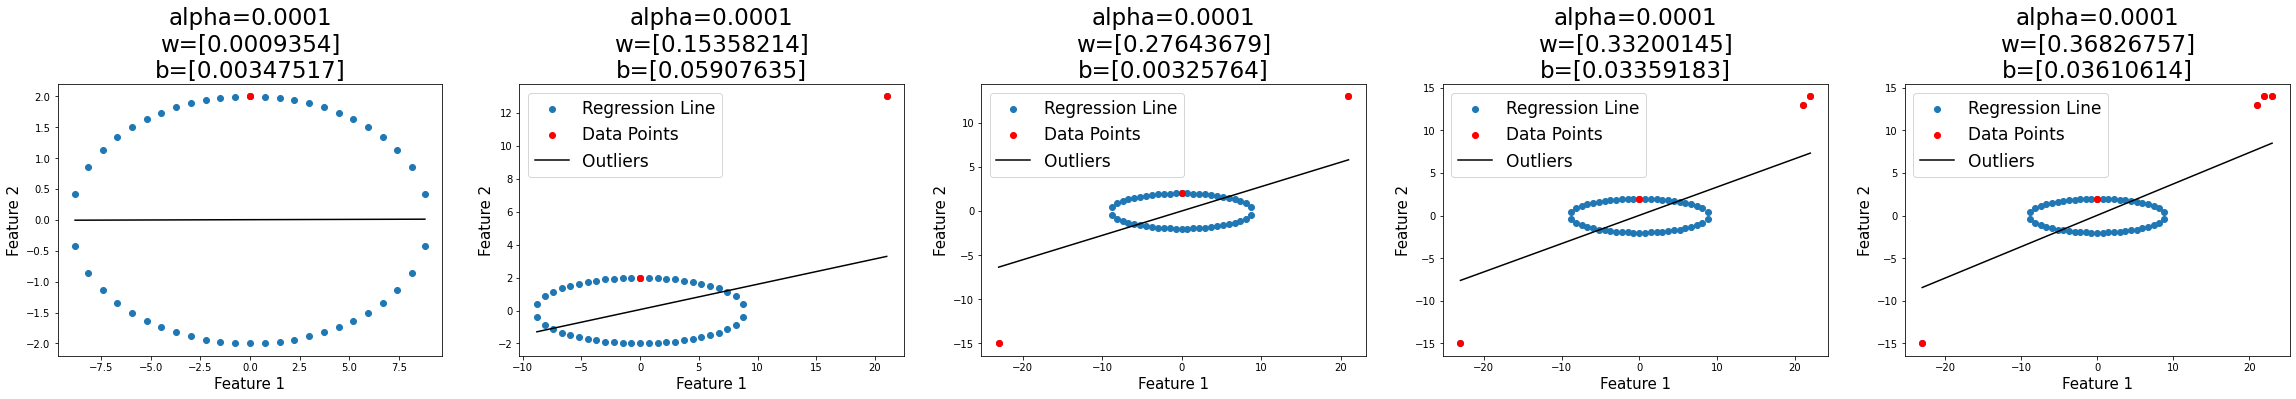

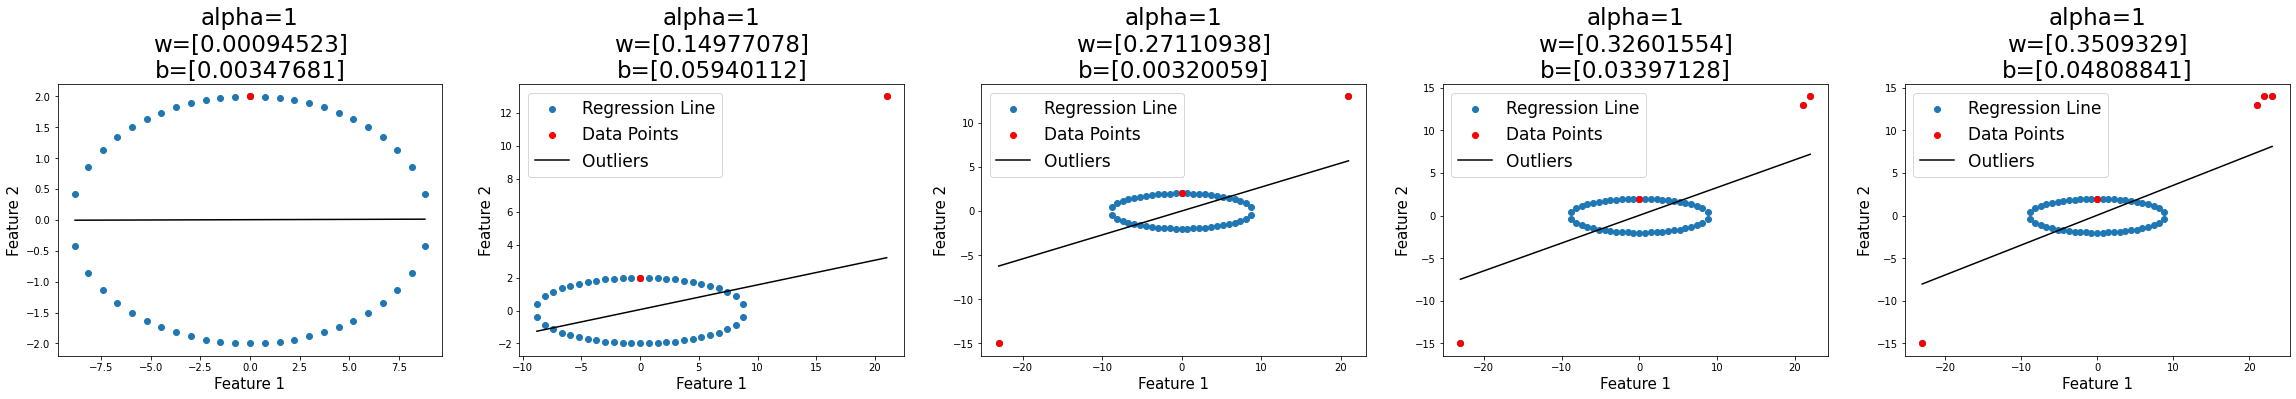

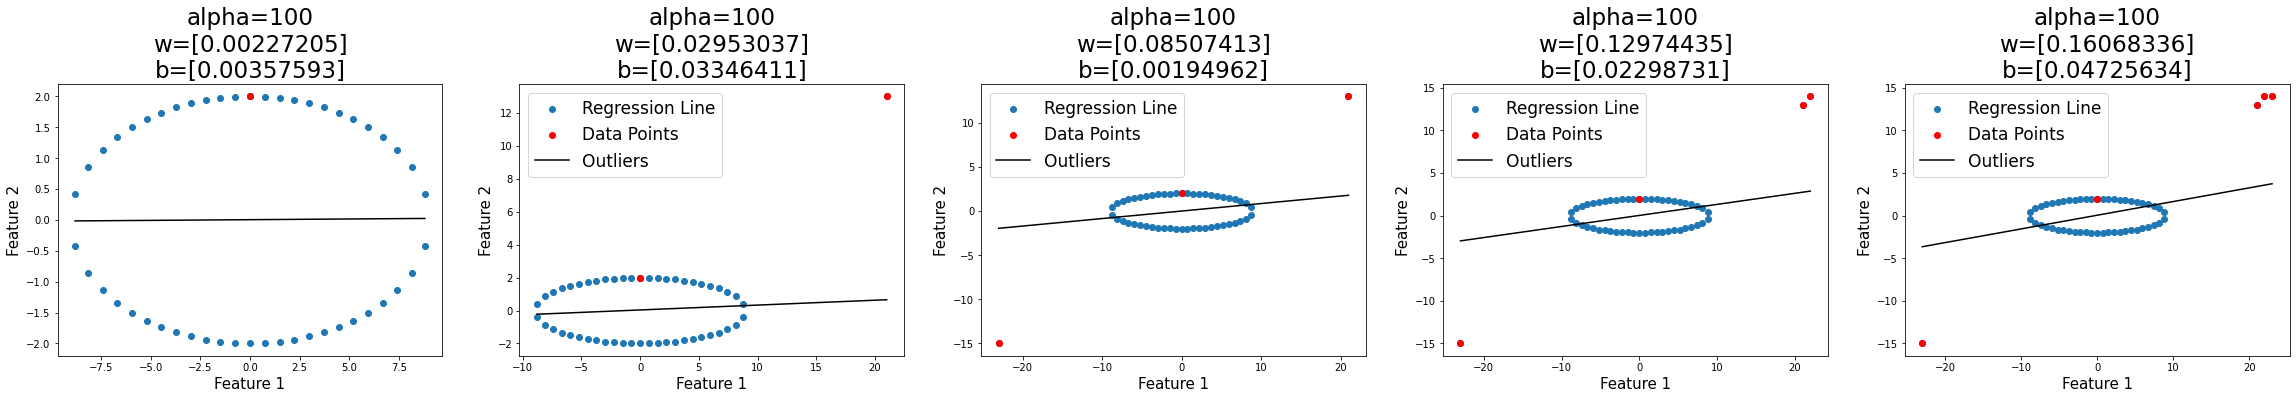

In [ ]:
from sklearn.linear_model import SGDRegressor
alpha = [0.0001, 1, 100] 
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] 

for a in alpha:
  X_reg = np.copy(X)
  Y_reg = np.copy(Y)
  plt.figure(figsize=(40,5))
  for i in range(len(outliers)):
    X_reg = np.append(X_reg,outliers[i][0]).reshape(-1,1)
    Y_reg = np.append(Y_reg,outliers[i][1]).reshape(-1,1)
    plt.subplot(1,len(outliers),i+1)
    plt.scatter(X_reg,Y_reg)
    plt.scatter(X_reg[len(X_reg)-i-1:],Y_reg[len(Y_reg)-i-1:], color='red')
    plt.xlabel('Feature 1',fontsize=15)
    plt.ylabel('Feature 2',fontsize=15)
    reg = SGDRegressor(alpha=a,eta0=0.001,random_state=15)
    reg.fit(X_reg,Y_reg)
    coef = reg.coef_ 
    intercept = reg.intercept_
    plt.title(f'alpha={a}\nw={coef}\nb={intercept}', fontsize=23)
    x1 = max(X_reg)
    x2 = min(X_reg)
    y1 = coef*x1 + intercept
    y2 = coef[0]*x2 + intercept[0]
    plt.plot( [x1,x2] , [y1,y2] , color='black')
    if i!=0:
      plt.legend(labels=['Regression Line','Data Points','Outliers'],fontsize=17)
  plt.show()